# BLG556E - Digital Solution for Smart Cities

Halit Uyanık - 504202506<br>
Kadir Şinas Kaynak - 504191525


In [1]:
import os
import sys
import urllib.request
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from utilities.PreProcessingUtil import preprocessing

In [2]:
#read pollutant values
# A N by T feature matrix, which describes the (f_1, .., f_T) speed records over T timesteps for the N sensors.
dfPollutant = pd.read_excel(
     "datasets/training/kartal_combined.xlsx",
     engine='openpyxl',
     parse_dates=True,
     thousands='.'
)



In [3]:
dfPollutant

,Unnamed: 0,Tarih,PM10 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),O3 ( µg/m3 ),PM 2.5 ( µg/m3 ),DATE_TIME,OBSERVATORY_NAME,AVERAGE_TEMPERATURE,AVERAGE_HUMIDITY,AVERAGE_WIND,AVERAGE_DIRECTIONOFWIND,AVERAGE_PRECIPITATION,AVERAGE_ROAD_TEMPERATURE
0,0,2020-01-01 00:00:56,38.299999,4.9,1658.199951,53.700001,135.199997,61.299999,24.000000,2020-01-01 00:00:00,KARTAL,7.91071,72.82143,2.12679,302.69643,-99,-99
1,1,2020-01-01 01:00:56,36.599998,5.1,1709.500000,62.000000,239.199997,171.199997,31.000000,2020-01-01 01:00:00,KARTAL,7.65000,74.05172,2.24138,307.05172,-99,-99
2,2,2020-01-01 02:00:56,48.500000,4.6,1495.000000,48.900002,84.800003,70.800003,24.400000,2020-01-01 02:00:00,KARTAL,7.22295,70.57377,2.38033,320.54098,-99,-99
3,3,2020-01-01 03:00:56,43.000000,4.5,1298.599976,31.400000,39.599998,137.000000,32.900002,2020-01-01 03:00:00,KARTAL,6.66607,58.62500,1.23571,313.35714,-99,-99
4,4,2020-01-01 04:00:56,34.299999,3.6,1183.599976,33.200001,41.099998,145.199997,23.000000,2020-01-01 04:00:00,KARTAL,6.52500,60.05000,1.17167,277.20000,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,10003,2021-02-20 19:00:56,40.599998,3.0,729.299988,71.400002,20.000000,20.900000,12.300000,2021-02-20 19:00:00,KARTAL,2.89167,57.66667,1.37708,118.62500,-99,-99
10004,10004,2021-02-20 20:00:56,34.799999,2.9,928.599976,91.599998,19.600000,10.200000,21.600000,2021-02-20 20:00:00,KARTAL,2.75714,58.30357,1.49464,94.91071,-99,-99
10005,10005,2021-02-20 21:00:56,25.299999,3.3,812.200012,98.599998,19.400000,18.700001,282.299988,2021-02-20 21:00:00,KARTAL,2.82321,60.17857,2.14643,86.00000,-99,-99
10006,10006,2021-02-20 22:00:56,26.900000,3.5,616.099976,102.099998,25.900000,44.799999,187.199997,2021-02-20 22:00:00,KARTAL,2.82407,61.22222,1.99074,87.48148,-99,-99


In [4]:
# select columns
dfPollutant = dfPollutant[['PM10 ( µg/m3 )','SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'O3 ( µg/m3 )', 'PM 2.5 ( µg/m3 )', 'AVERAGE_TEMPERATURE','AVERAGE_HUMIDITY', 'AVERAGE_WIND', 'AVERAGE_DIRECTIONOFWIND','AVERAGE_PRECIPITATION', 'AVERAGE_ROAD_TEMPERATURE']]


# select all pollutant
#dfPollutant = dfPollutant[['PM10 ( µg/m3 )','SO2 ( µg/m3 )','CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'O3 ( µg/m3 )', 'PM 2.5 ( µg/m3 )']]

# select all meteology
#dfPollutant = dfPollutant[['PM10 ( µg/m3 )','AVERAGE_TEMPERATURE','AVERAGE_HUMIDITY', 'AVERAGE_WIND', 'AVERAGE_DIRECTIONOFWIND','AVERAGE_PRECIPITATION','AVERAGE_ROAD_TEMPERATURE']]

#dfPollutant = dfPollutant[['PM10 ( µg/m3 )','AVERAGE_ROAD_TEMPERATURE']]

In [5]:
##only pollution values
#
##remove index column
#dfPollutant = dfPollutant.iloc[: , 1:] 
#
##dataset info
#time_len, num_pol = dfPollutant.shape
#print("No. of pollution:", num_pol-1, "\nNo of timesteps:", time_len)
#
#dfPollutant = dfPollutant.iloc[-20000:,:]
#dfPollutant=preprocessing(dfPollutant)

In [6]:
#values = dfPollutant.values
## specify columns to plot
#groups = [0, 1, 2, 3, 5, 6]
#i = 1
## plot each column
#plt.figure(figsize=(12, 8), dpi=100)
#for group in groups:
#	pyplot.subplot(len(groups), 1, i)
#	pyplot.plot(values[:, group])
#	pyplot.title(dfPollutant.columns[group], y=0.5, loc='right')
#	i += 1
#pyplot.show()

In [7]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [8]:
# load dataset
values = dfPollutant.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.052863   0.010410   0.027309   0.139776   0.106445   0.128394   
2   0.050454   0.010844   0.028154   0.161874   0.190438   0.359714   
3   0.067319   0.009759   0.024621   0.126997   0.065741   0.148390   
4   0.059524   0.009542   0.021387   0.080405   0.029236   0.287729   
5   0.047194   0.007591   0.019493   0.085197   0.030447   0.304988   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...   var4(t)   var5(t)  \
1   0.081763   0.280326   0.646496    0.355383  ...  0.161874  0.190438   
2   0.106648   0.273392   0.662498    0.376177  ...  0.126997  0.065741   
3   0.083185   0.262035   0.617261    0.401391  ...  0.080405  0.029236   
4   0.113402   0.247225   0.461847    0.193687  ...  0.085197  0.030447   
5   0.078208   0.243473   0.480381    0.182067  ...  0.096379  0.031336   

    var6(t)   var7(t)   var8(t)   var9(t)  var10(t)  var11(t)  var12(t)  \
1  0.359714  0.106648  0.273392  0.662498  0.37

In [9]:
reframed = reframed[['var1(t-1)', 'var2(t-1)',  'var3(t-1)',  'var4(t-1)',  'var5(t-1)',  'var6(t-1)',  'var7(t-1)',  'var8(t-1)',  'var9(t-1)','var10(t-1)',  'var11(t-1)',  'var12(t-1)',  'var13(t-1)', 'var1(t)']]

# all pollutant and meteorology
#reframed = reframed[['var1(t-1)', 'var2(t-1)',  'var3(t-1)',  'var4(t-1)',  'var5(t-1)',  'var6(t-1)',  'var7(t-1)', 'var1(t)']]

#reframed = reframed[['var1(t-1)', 'var2(t-1)', 'var1(t)']]

In [10]:
train_rate = 0.8
# split into train and test sets
values = reframed.values
n_train_hours = reframed.shape[0] * train_rate
int(n_train_hours)

8005

In [11]:
train_rate = 0.8
# split into train and test sets
values = reframed.values
n_train_hours = int(reframed.shape[0] * train_rate)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8005, 1, 13) (8005,) (2002, 1, 13) (2002,)


In [12]:
lstm_layer_sizes = 50
lstm_activations = "tanh"
loss='mae'
optimizer='adam'
n_epochs=50
batch_size=72
shuffle=False
verbose=2
# design network
model = Sequential()
model.add(LSTM(lstm_layer_sizes, activation=lstm_activations, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=loss, optimizer=optimizer)
# fit network
history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=verbose, shuffle=shuffle)


Epoch 1/50
112/112 - 1s - loss: 0.0357 - val_loss: 0.0208
Epoch 2/50
112/112 - 0s - loss: 0.0273 - val_loss: 0.0194
Epoch 3/50
112/112 - 0s - loss: 0.0225 - val_loss: 0.0154
Epoch 4/50
112/112 - 0s - loss: 0.0190 - val_loss: 0.0116
Epoch 5/50
112/112 - 0s - loss: 0.0168 - val_loss: 0.0101
Epoch 6/50
112/112 - 0s - loss: 0.0158 - val_loss: 0.0101
Epoch 7/50
112/112 - 0s - loss: 0.0154 - val_loss: 0.0091
Epoch 8/50
112/112 - 0s - loss: 0.0153 - val_loss: 0.0092
Epoch 9/50
112/112 - 0s - loss: 0.0147 - val_loss: 0.0093
Epoch 10/50
112/112 - 0s - loss: 0.0145 - val_loss: 0.0095
Epoch 11/50
112/112 - 0s - loss: 0.0141 - val_loss: 0.0089
Epoch 12/50
112/112 - 0s - loss: 0.0144 - val_loss: 0.0098
Epoch 13/50
112/112 - 0s - loss: 0.0143 - val_loss: 0.0090
Epoch 14/50
112/112 - 0s - loss: 0.0140 - val_loss: 0.0089
Epoch 15/50
112/112 - 0s - loss: 0.0138 - val_loss: 0.0094
Epoch 16/50
112/112 - 0s - loss: 0.0138 - val_loss: 0.0095
Epoch 17/50
112/112 - 0s - loss: 0.0140 - val_loss: 0.0087
Epoch 

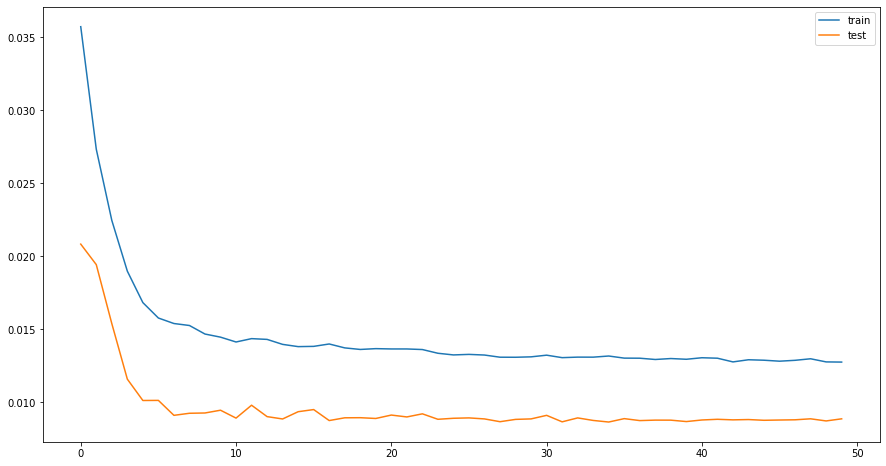

In [13]:
# plot history
fig = plt.figure(figsize=(15, 8))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [15]:
print(inv_y[:10])
print(inv_yhat[:10])

[ 59.2      49.8      37.2      34.3      41.4     218.      192.29999
 137.2      91.3      95.4    ]
[ 56.968327  57.210682  49.393764  38.949112  38.60234   47.472977
 192.72609  174.9544   116.25647   85.04431 ]


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(inv_y, inv_yhat) #y_true, y_pred
rmse = sqrt(mean_squared_error(inv_y, inv_yhat)) #y_true, y_pred
mase = sqrt(mean_absolute_error(inv_y, inv_yhat)) #y_true, y_pred

print('------------------------------------------\n')
print('MSE:',mse)
print('RMSE:',rmse)
print('MASE:',mase)
print('------------------------------------------')

------------------------------------------

MSE: 185.69604
RMSE: 13.627033606837367
MASE: 2.5006847397529053
------------------------------------------


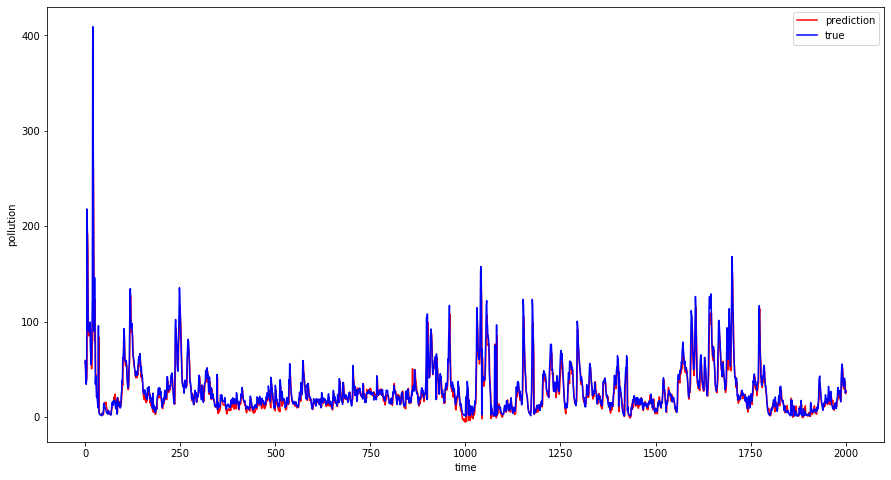

In [17]:
##all test result visualization
fig1 = plt.figure(figsize=(15, 8))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = inv_yhat[:]
a_true = inv_y[:]
plt.plot(a_pred, "r-", label="prediction")
plt.plot(a_true, "b-", label="true")
plt.xlabel("time")
plt.ylabel("pollution")
plt.legend(loc="best", fontsize=10)
plt.show()

In [18]:
# Output all results to a sub-directory
import datetime
import pathlib
import os
path = pathlib.Path().absolute()
time = datetime.datetime.now().strftime("%m-%d-%Y %H-%M-%S")
result_dir = os.path.join (path, "experiments", time)
os.mkdir (result_dir)

# Create the result txt file
f = open(result_dir + "/" + "summary.txt", "w")

# Write experiment parameters
f.write ("---------Experiment Parameters--------")
f.write ("\nTrain-Test split rate: " + str(train_rate))
f.write ("\nNumber of epochs: " + str(n_epochs))
f.write ("\nBatch size: " + str(batch_size))
f.write ("\nShuffle during training: " + str(shuffle))
f.write ("\nVerbose: " + str(verbose))
f.write ("\n---------------------------")

# Write dataset details
f.write ("\n---------Dataset Details--------")
time_len, pollution_len = dfPollutant.shape
f.write ("\nNo of pollution:" + str(pollution_len-1) + "\nNo of timesteps:" + str(time_len-1))
f.write ("\nTrain data: " + str(train.shape))
f.write ("\nTest data: " + str(test.shape))

f.write ("\nTrain data X: " + str(train_X.shape))
f.write ("\nTrain data Y: " + str(train_y.shape))
f.write ("\nTest data X: " + str(test_X.shape))
f.write ("\nTest data Y: " + str(test_y.shape))
f.write ("\n---------------------------")

# Write model details
f.write ("\n---------Model Details--------")
f.write ("\nLSTM layer sizes: " + str(lstm_layer_sizes))
f.write ("\nLSTM activation functions: " + str(lstm_activations))
f.write ("\nOptimizer: " + optimizer)
f.write ("\nLoss function: " + loss)
f.write ("\n---------------------------")

# Write results
f.write ('\nTest RMSE: %.3f' % rmse)

# Write visual outputs
fig.savefig (result_dir + "/" + "MAE-vs-Naive.png")
fig1.savefig (result_dir + "/" + "prediction-accuracy.png")

f.close ()